In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eng-french-translation/ted-talks-corpus/test.fr
/kaggle/input/eng-french-translation/ted-talks-corpus/dev.en
/kaggle/input/eng-french-translation/ted-talks-corpus/dev.fr
/kaggle/input/eng-french-translation/ted-talks-corpus/train.fr
/kaggle/input/eng-french-translation/ted-talks-corpus/test.en
/kaggle/input/eng-french-translation/ted-talks-corpus/train.en


# Data Extraction

In [7]:

file_path = "/kaggle/input/eng-french-translation/ted-talks-corpus/dev.en"  # Replace with the path to your "dev.en" file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read() 
sentences = data.split('\n')
dev_en = [[sentence.strip()] for sentence in sentences if sentence.strip()]


file_path = "/kaggle/input/eng-french-translation/ted-talks-corpus/dev.fr"  # Replace with the path to your "dev.en" file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()
sentences = data.split('\n')
dev_fr = [[sentence.strip()] for sentence in sentences if sentence.strip()]


file_path = "/kaggle/input/eng-french-translation/ted-talks-corpus/test.en"  # Replace with the path to your "dev.en" file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()
sentences = data.split('\n')
test_en = [[sentence.strip()] for sentence in sentences if sentence.strip()]


file_path = "/kaggle/input/eng-french-translation/ted-talks-corpus/test.fr"  # Replace with the path to your "dev.en" file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()
sentences = data.split('\n')
test_fr = [[sentence.strip()] for sentence in sentences if sentence.strip()]


file_path = "/kaggle/input/eng-french-translation/ted-talks-corpus/train.en"  # Replace with the path to your "dev.en" file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()
sentences = data.split('\n')
train_en = [[sentence.strip()] for sentence in sentences if sentence.strip()]


file_path = "/kaggle/input/eng-french-translation/ted-talks-corpus/train.fr"  # Replace with the path to your "dev.en" file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()
sentences = data.split('\n')
train_fr = [[sentence.strip()] for sentence in sentences if sentence.strip()]

In [8]:
len( dev_en)

887

In [9]:
!python -m spacy download fr_core_news_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 41.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [10]:
import spacy

# Load the English and French spaCy models
nlp_en = spacy.load("en_core_web_sm")
nlp_fr = spacy.load("fr_core_news_sm")

# Tokenization and special tokens
def tokenize_and_add_special_tokens(data, language):
    tokenized_data = []
    for sentence in data:
        doc = language(sentence[0])
        tokens = ["<bos>"] + [token.text for token in doc] + ["<eos>"]
        tokenized_data.append(tokens)
    return tokenized_data

# Tokenize and add special tokens to English sentences
train_en = tokenize_and_add_special_tokens(train_en, nlp_en)

# Tokenize and add special tokens to French sentences
train_fr = tokenize_and_add_special_tokens(train_fr, nlp_fr)

# Tokenize and add special tokens to English sentences
test_en = tokenize_and_add_special_tokens(test_en, nlp_en)

# Tokenize and add special tokens to French sentences
test_fr = tokenize_and_add_special_tokens(test_fr, nlp_fr)
# Tokenize and add special tokens to English sentences

dev_en = tokenize_and_add_special_tokens(dev_en, nlp_en)

# Tokenize and add special tokens to French sentences
dev_fr = tokenize_and_add_special_tokens(dev_fr, nlp_fr)


In [11]:
max_sentence_length = max(len(sentence) for sentence in train_en + train_fr)

In [12]:
len(dev_fr)

887

In [13]:
filtered_train_fr = []
filtered_train_en = []

for sentence_fr, sentence_en in zip(train_fr, train_en):
    if len(sentence_fr) <= 100 and len(sentence_en) <= 100:
        filtered_train_fr.append(sentence_fr)
        filtered_train_en.append(sentence_en)

train_fr = filtered_train_fr
train_en = filtered_train_en

In [14]:
filtered_dev_fr = []
filtered_dev_en = []

for sentence_fr, sentence_en in zip(dev_fr, dev_en):
    if len(sentence_fr) <= 100 and len(sentence_en) <= 100:
        filtered_dev_fr.append(sentence_fr)
        filtered_dev_en.append(sentence_en)

dev_fr = filtered_dev_fr
dev_en = filtered_dev_en

In [15]:
filtered_test_fr = []
filtered_test_en = []

for sentence_fr, sentence_en in zip(test_fr, test_en):
    if len(sentence_fr) <= 100 and len(sentence_en) <= 100:
        filtered_test_fr.append(sentence_fr)
        filtered_test_en.append(sentence_en)

test_fr = filtered_test_fr
test_en = filtered_test_en

In [16]:
# filtered_train_fr = []
# filtered_train_en = []

# for sentence_fr, sentence_en in zip(train_fr, train_en):
#     if len(sentence_fr) <= 100 and len(sentence_en) <= 100:
#         filtered_train_fr.append(sentence_fr)
#         filtered_train_en.append(sentence_en)

# train_fr = filtered_train_fr
# train_en = filtered_train_en
# # //////////////////

# # //////////////////
# filtered_dev_fr = []
# filtered_dev_en = []

# for sentence_fr, sentence_en in zip(dev_fr, dev_en):
#     if len(sentence_fr) <= 100 and len(sentence_en) <= 100:
#         filtered_dev_fr.append(sentence_fr)
#         filtered_dev_en.append(sentence_en)

# dev_fr = filtered_dev_fr
# dev_en = filtered_dev_en


In [17]:
# train_fr = [sentence for sentence in train_fr if len(sentence) <= 100]
# train_en = [sentence for sentence in train_en if len(sentence) <= 100]
# test_en = [sentence for sentence in test_en if len(sentence) <= 100]
# test_fr = [sentence for sentence in test_fr if len(sentence) <= 100]
# dev_en = [sentence for sentence in dev_en if len(sentence) <= 100]
# dev_fr = [sentence for sentence in dev_fr if len(sentence) <= 100]

In [18]:
for sentence in train_fr + train_en + test_en + test_fr + dev_en + dev_fr:
    while len(sentence) < 100:
        sentence.append("<pad>")
    for i in range(len(sentence)):
        if sentence[i] == "":
            sentence[i] = "<unk>"

In [19]:
max_sentence_length = max(len(sentence) for sentence in train_en + train_fr)

In [20]:
max_sentence_length

100

In [21]:
# Flatten the list of lists to create a single list of tokens
all_tokens_en = [token for sentence in train_en for token in sentence]
all_tokens_fr = [token for sentence in train_fr for token in sentence]

# Create a set to remove duplicates and form your vocabulary
vocab_en = set(all_tokens_en)
vocab_fr = set(all_tokens_fr)

In [22]:
# Optionally, add special tokens to the vocabulary if they are not present
special_tokens = ['<bos>', '<eos>', '<pad>', '<unk>']
for token in special_tokens:
    vocab_en.add(token)
    vocab_fr.add(token)

In [23]:
vocab_en = list(vocab_en)
vocab_fr = list(vocab_fr)

In [24]:
len(vocab_en)

24858

In [25]:
# Create a mapping from tokens to their indices
token_to_index_en = {token: index for index, token in enumerate(vocab_en)}

# Convert each tokenized sentence to a list of indices
train_en_indices = []
for sentence in train_en:
    sentence_indices = [token_to_index_en.get(token, token_to_index_en['<unk>']) for token in sentence]
    train_en_indices.append(sentence_indices)

# 'train_en_indices' now contains the list of indices for each sentence
dev_en_indices = []
for sentence in dev_en:
    sentence_indices = [token_to_index_en.get(token, token_to_index_en['<unk>']) for token in sentence]
    dev_en_indices.append(sentence_indices)
    
test_en_indices = []
for sentence in test_en:
    sentence_indices = [token_to_index_en.get(token, token_to_index_en['<unk>']) for token in sentence]
    test_en_indices.append(sentence_indices)

In [26]:
# Create a mapping from tokens to their indices
token_to_index_fr = {token: index for index, token in enumerate(vocab_fr)}

# Convert each tokenized sentence to a list of indices
train_fr_indices = []
for sentence in train_fr:
    sentence_indices = [token_to_index_fr.get(token, token_to_index_fr['<unk>']) for token in sentence]
    train_fr_indices.append(sentence_indices)

# 'train_en_indices' now contains the list of indices for each sentence
dev_fr_indices = []
for sentence in dev_fr:
    sentence_indices = [token_to_index_fr.get(token, token_to_index_fr['<unk>']) for token in sentence]
    dev_fr_indices.append(sentence_indices)
    
test_fr_indices = []
for sentence in test_fr:
    sentence_indices = [token_to_index_fr.get(token, token_to_index_fr['<unk>']) for token in sentence]
    test_fr_indices.append(sentence_indices)

In [27]:
len(dev_fr_indices)

883

Data preprocessing done

# TRANSFORMER

Multihead Attention 

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy

In [29]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        # Ensure that the model dimension (d_model) is divisible by the number of heads
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        # Initialize dimensions
        self.d_model = d_model # Model's dimension
        self.num_heads = num_heads # Number of attention heads
        self.d_k = d_model // num_heads # Dimension of each head's key, query, and value
        
        # Linear layers for transforming inputs
        self.W_q = nn.Linear(d_model, d_model) # Query transformation
        self.W_k = nn.Linear(d_model, d_model) # Key transformation
        self.W_v = nn.Linear(d_model, d_model) # Value transformation
        self.W_o = nn.Linear(d_model, d_model) # Output transformation
        
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        # Calculate attention scores
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        
        # Apply mask if provided (useful for preventing attention to certain parts like padding)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        
        # Softmax is applied to obtain attention probabilities
        attn_probs = torch.softmax(attn_scores, dim=-1)
        
        # Multiply by values to obtain the final output
        output = torch.matmul(attn_probs, V)
        return output
        
    def split_heads(self, x):
        # Reshape the input to have num_heads for multi-head attention
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
    def combine_heads(self, x):
        # Combine the multiple heads back to original shape
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        
    def forward(self, Q, K, V, mask=None):
        # Apply linear transformations and split heads
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))
        
        # Perform scaled dot-product attention
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        
        # Combine heads and apply output transformation
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [30]:
class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass through the first linear layer and apply ReLU activation
        intermediate = self.fc1(x)
        intermediate = self.relu(intermediate)
        
        # Pass through the second linear layer
        output = self.fc2(intermediate)
        
        return output

In [31]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()
        
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe.unsqueeze(0))
        
    def forward(self, x):
        encoding = x + self.pe[:, :x.size(1)]
        return encoding

ENCODER

In [32]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        # Multi-Head Self-Attention for the source sequence
        attn_output = self.self_attn(src, src, src, src_mask)
        src = self.norm1(src + self.dropout(attn_output))
        
        # Position-wise Feed-Forward Network
        ff_output = self.feed_forward(src)
        src = self.norm2(src + self.dropout(ff_output))
        
        return src


DECODER

In [33]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.src_tgt_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, tgt, enc_output, src_mask, tgt_mask):
        # Self-Attention for the target sequence
        attn_output = self.self_attn(tgt, tgt, tgt, tgt_mask)
        tgt = self.norm1(tgt + self.dropout(attn_output))
        
        # Cross-Attention between target and source
        cross_attn_output = self.src_tgt_attn(tgt, enc_output, enc_output, src_mask)
        tgt = self.norm2(tgt + self.dropout(cross_attn_output))
        
        # Position-wise Feed-Forward Network
        ff_output = self.feed_forward(tgt)
        tgt = self.norm3(tgt + self.dropout(ff_output))
        
        return tgt


TRANSFORMER's MAIN ARCHITECTURE

In [34]:
import torch

class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2).to(self.device)  # Move to the same device as the model
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3).to(self.device)  # Move to the same device as the model
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length, device=self.device), diagonal=1)).bool()
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            enc_output = enc_layer(enc_output, src_mask)

        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        return output


# Training and Eval

SAMPLE TRAINING

In [35]:
# Create batches
def batching(data, batch_size):
    num_batches = len(data) // batch_size
    batches = []
    for i in range(num_batches-2):
        batch = data[i * batch_size : (i + 1) * batch_size]
#         print(batch)
        batches.append(torch.tensor(batch))
    return batches

In [36]:
src_vocab_size = len(vocab_en)
tgt_vocab_size = len(vocab_fr)
d_model = 304
num_heads = 8
num_layers = 1
d_ff = 2048
max_seq_length = max_sentence_length # 100 
dropout = 0.1

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)

# Generate random sample data
src_data = batching(train_en_indices, 64)  # (batch_size, seq_length)
tgt_data = batching(train_fr_indices, 64)  # (batch_size, seq_length)

In [37]:
dev_src_data = batching(dev_en_indices, 32)  # (batch_size, seq_length)
dev_tgt_data = batching(dev_fr_indices, 32)  # (batch_size, seq_length)

In [38]:
len(dev_src_data)

25

In [39]:
test_src_data = batching(test_en_indices, 32)  # (batch_size, seq_length)
test_tgt_data = batching(test_fr_indices, 32)  # (batch_size, seq_length)

In [40]:
# tgt_data_sample = torch.randint(1, 1000, (64, 100)) 

In [41]:
# len(tgt_data_sample[0][0])

In [42]:
len(tgt_data)

932

In [43]:
tgt_data[0]

tensor([[11921, 25551,  5039,  ...,  6901,  6901,  6901],
        [11921,   457, 11466,  ...,  6901,  6901,  6901],
        [11921,   457,  5619,  ...,  6901,  6901,  6901],
        ...,
        [11921, 16215, 29080,  ...,  6901,  6901,  6901],
        [11921, 28059,  1708,  ...,  6901,  6901,  6901],
        [11921, 13337,   443,  ...,  6901,  6901,  6901]])

In [44]:
transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout)

In [45]:
len(src_data)

932

TRAINING CODE

In [46]:
import torch
from tqdm import tqdm

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
transformer.to(device)

# Rest of your code
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr=0.0001)

transformer.train()

# Create a file to store training details
with open("train_model.txt", "w") as train_file:
    for epoch in range(10):
        # Initialize epoch loss
        epoch_loss = 0.0

        # Use tqdm with enumerate to create a progress bar
        for i, (src, tgt) in enumerate(tqdm(zip(src_data, tgt_data), desc=f"Epoch {epoch + 1}")):
            src = src.to(device)  # Move source data to the GPU
            tgt = tgt.to(device)  # Move target data to the GPU
            optimizer.zero_grad()
            output = transformer(src, tgt[:, :-1])
            loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt[:, 1:].contiguous().view(-1))
            loss.backward()
            optimizer.step()

            # Update the epoch loss
            epoch_loss += loss.item()

        # Calculate the average loss for the epoch
        average_epoch_loss = epoch_loss / len(src_data)

        # Print the epoch loss and save to the train_model.txt file
        print(f"Epoch: {epoch + 1}, Loss: {average_epoch_loss}")
        train_file.write(f"Epoch: {epoch + 1}, Loss: {average_epoch_loss}\n")


Epoch 1: 932it [00:58, 15.87it/s]


Epoch: 1, Loss: 1.6223619431257248


Epoch 2: 932it [00:56, 16.39it/s]


Epoch: 2, Loss: 1.2331903185455584


Epoch 3: 932it [00:56, 16.40it/s]


Epoch: 3, Loss: 1.1212510903058135


Epoch 4: 932it [00:56, 16.41it/s]


Epoch: 4, Loss: 1.0427557232553868


Epoch 5: 932it [00:56, 16.41it/s]


Epoch: 5, Loss: 0.983944258720578


Epoch 6: 932it [00:56, 16.40it/s]


Epoch: 6, Loss: 0.9349546251826532


Epoch 7: 932it [00:56, 16.40it/s]


Epoch: 7, Loss: 0.8925832336360805


Epoch 8: 932it [00:56, 16.40it/s]


Epoch: 8, Loss: 0.8536029376825038


Epoch 9: 932it [00:56, 16.41it/s]


Epoch: 9, Loss: 0.8165860563004989


Epoch 10: 932it [00:56, 16.39it/s]

Epoch: 10, Loss: 0.7815417676940241


In [47]:
(test_tgt_data[0][0])

tensor([11921, 28441, 19332, 10267,   443,  9836,  6366, 19332, 21109, 14975,
         7636,   355,  8525, 23362,  4616,  6636, 10407, 10026,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,
         6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901,  6901])

TEST BLEU WITH PADDING

In [48]:
def indices_to_words(indices):
#     print(indices)
    # Replace this with your vocabulary mapping
    # In this example, it's just a simple list, but you should use your actual vocabulary.
    vocab = vocab_fr

    words = [vocab[index] for index in indices[0] if index != 15008]
    return words

In [49]:
def indices_to_wordss(indices): 
    vocab = vocab_fr
#     print("dddd",indices[0])

    indices = [token for token in indices if token != 15008]
    words = [vocab[token] for token in indices]
    return words

In [50]:
# reference_indices = [  351  2803 22736  8253 10752  4946  2803 13905 16241 24236 20154 12154
#  11629 11629 24615 11629 13162 15008 15008 15008 15008 15008 15008 15008
#  15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008
#  15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008
#  15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008
#  15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008
#  15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008
#  15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008 15008
#  15008 15008 15008]
# reference_words = indices_to_words(reference_indices)
# print(reference_words)

In [51]:
pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
import sacrebleu

# Example references and hypothesis
references = ['Quand j avais la vingtaine , j ai vu mes tout premiers clients comme <unk> .']


hypotheses = ['Quand je étais mon première , je ai vu mes professeurs à . . professeur .']


# Calculate BLEU scores using sacrebleu
bleu = sacrebleu.corpus_bleu(hypotheses, [references], force=True)

print(f"Predicted BLEU Score: {bleu.score}")


Predicted BLEU Score: 9.55389238170021


In [53]:
def stringgg(sentence):
    # Remove the last token
    sentence_without_last_token = sentence[:-1]

    # Convert the list to a single string
    sentence_string = ' '.join(sentence_without_last_token)
    return [sentence_string]

In [66]:
import torch
from tqdm import tqdm
import nltk
import numpy as np

# Assuming you have test_src_data and test_tgt_data with batching
transformer.eval()  # Set the model to evaluation mode

# Initialize variables to store test loss and BLEU scores
test_loss = 0.0
total_samples = 0
bleu_scores = []

# Create a file to store BLEU scores
output_file = open('test_bleu_scores.txt', 'w')

# Use tqdm with enumerate to create a progress bar
for i, (src, tgt) in enumerate(tqdm(zip(test_src_data, test_tgt_data), desc="Testing")):
    src = src.to(device)  # Move source data to the GPU
    tgt = tgt.to(device)  # Move target data to the GPU

    with torch.no_grad():  # Disable gradient computation for testing
        output = transformer(src, tgt[:, :-1])
        loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt[:, 1:].contiguous().view(-1))

    test_loss += loss.item()
    total_samples += src.size(0)  # Increment total samples by batch size

    # Calculate BLEU scores for the current batch
    for b in range(src.size(0)):  # Iterate over batch
        reference = [tgt[b, 1:].cpu().numpy()]
#         print(reference)
        hypothesis = torch.argmax(output[b], dim=1).cpu().numpy()
        
        reference_words = indices_to_words(reference)
        hypothesis_words = indices_to_wordss(hypothesis)
        hypothesis_words = stringgg(hypothesis_words)
        reference_words = stringgg(reference_words)
        print(hypothesis_words)
        print(reference_words)
        bleu = sacrebleu.corpus_bleu(hypothesis_words, [reference_words], force=True)
        bleu_scores.append(bleu.score)

    # Write the BLEU scores to the output file for this batch
    output_file.write(f"Batch {i + 1} BLEU scores: {', '.join([str(bleu) for bleu in bleu_scores[-src.size(0):]])}\n")

# Calculate the average test loss
average_test_loss = test_loss / total_samples

# Calculate the average BLEU score for the entire dataset
average_bleu_score = np.mean(bleu_scores)

print(f"Test Loss: {average_test_loss}")
print(f"Average BLEU Score: {average_bleu_score}")

# Close the output file
output_file.close()


Testing: 2it [00:00, 14.08it/s]

["Quand j' étais mon ma , j' ai vu mon collègues mon . . mon . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Quand j' avais la vingtaine , j' ai vu mes tout premiers clients comme <unk> . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 4it [00:00, 13.41it/s]

["Les amis amis sont des pour les donner les l' intérieur , mais qui abeilles qui la qui comme sont avec elles qui , choses , , , , ils sont , et qu' ils sont , et ils sont . et ils sont . et ils ils sont . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Les meilleurs amis sont super pour vous emmener à l' aéroport , mais les jeunes de vingt ans qui restent entre gens ayant les mêmes <unk> <unk> ceux qu' ils connaissent , ce qu' ils connaissent , comment ils pensent , comment ils parlent , et où ils travaillent . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

Testing: 8it [00:00, 13.72it/s]

['Il est beaucoup image échelle . accord . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["C' est une grande source d' enseignements . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

Testing: 10it [00:00, 13.54it/s]

['Un de , langage de les langage et et les langue . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Proust fait le lien entre le langage <unk> et la jalousie . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 14it [00:01, 13.60it/s]

["Je voulais faire les m' trouve le la journée . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
['Je voulais comprendre qui se charge de la tâche . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

Testing: 16it [00:01, 13.57it/s]

["Si mon trois jours de de à l' école , , mon parents , , , les système et et que , je ai compris , bien si si nous ne avons pas tous les histoires , je a trouve mon les abeilles . mon . mon vie . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Si mes trois sœurs <unk> allaient à l' école publique , mes parents portaient <unk> contre le système scolaire pour obtenir que j' y aille aussi , et si nous n' avions pas tous des A , on se prenait tous les coups de <unk> de ma mère . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 20it [00:01, 13.62it/s]

['Nous nous faisons , nous devons besoin de problèmes problèmes . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Dans le passé , nous avons résolu de grands problèmes . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

Testing: 22it [00:01, 13.58it/s]

["C' était un homme de nombreuses et un jours , et , , dans plus deux de elle Afrique . être . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["C' était un tas de mecs et quelques femmes , différent grandement aussi bien en âge qu' en niveau d' hygiène . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

Testing: 24it [00:01, 13.55it/s]

['Et allez votre votre votre intérieur de votre maison , et vous voyez un air de voir sur la sol de la . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["Vous iriez ensuite à l' intérieur de votre maison , et vous verriez l' image de <unk> sur le dos de <unk> Ed . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

Testing: 26it [00:02, 10.96it/s]

['En ces ces différents très différentes , un des , comme , un des . . travail . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Dans tous ces contextes très différents , une caractéristique est <unk> comme un facteur significatif de succès . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

Testing: 30it [00:02, 12.16it/s]

['Et je voudrais vraiment à un solution pour permet à États-Unis de . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Et je voulais vraiment trouver une solution qui répondrait aux conditions climatiques locales . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 32it [00:02, 12.63it/s]

['Un beaucoup ces systèmes ont des éducation de . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["Plusieurs de ces systèmes ont l' effet inverse . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

Testing: 36it [00:02, 13.15it/s]

['Merci beaucoup . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Merci beaucoup . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 38it [00:02, 13.07it/s]

['Comment est -ce que est -il ça histoire ? -ce ? <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["Qu' est -ce qui fait que cette histoire est différente ? <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <

In [67]:
import torch
from tqdm import tqdm
import nltk
import numpy as np

padding_token_id = 15008

# Assuming you have test_src_data and test_tgt_data with batching
transformer.eval()  # Set the model to evaluation mode

# Initialize variables to store test loss and BLEU scores
test_loss = 0.0
total_bleu_score = 0.0
total_samples = 0

# Create a file to store BLEU scores
output_file = open('train_bleu_scores_wo_pad.txt', 'w')

# Use tqdm with enumerate to create a progress bar
for i, (src, tgt) in enumerate(tqdm(zip(src_data, tgt_data), desc="Testing")):
    src = src.to(device)  # Move source data to the GPU
    tgt = tgt.to(device)  # Move target data to the GPU

    with torch.no_grad():  # Disable gradient computation for testing
        output = transformer(src, tgt[:, :-1])
        loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt[:, 1:].contiguous().view(-1))

    test_loss += loss.item()

    # Initialize batch-level BLEU score
    batch_bleu_score = 0.0

    # Calculate BLEU score for the current sentence after removing padding tokens
    for b in range(src.size(0)):  # Iterate over batch
        reference = [token for token in tgt[b, 1:].cpu().numpy() if token != padding_token_id]
        hypothesis = [token for token in torch.argmax(output[b], dim=1).cpu().numpy() if token != padding_token_id]
        reference = np.array([reference])
        reference_words = indices_to_words(reference)
        hypothesis_words = indices_to_wordss(hypothesis)
        hypothesis_words = stringgg(hypothesis_words)
        reference_words = stringgg(reference_words)
        print(hypothesis_words)
        print(reference_words)
        print("/////////////////")
        bleu = sacrebleu.corpus_bleu(hypothesis_words, [reference_words], force=True)
#         bleu_scores.append(bleu.score)
        output_file.write(f"Sentence {i*src.size(0) + b + 1} BLEU: {bleu.score}\n")
#         print(bleu.score)
        batch_bleu_score += bleu.score

    # Update the total BLEU score and total number of samples
    total_bleu_score += batch_bleu_score
    total_samples += src.size(0)

# Calculate the average test loss
average_test_loss = test_loss / total_samples

# Calculate the total average BLEU score
total_average_bleu_score = total_bleu_score / total_samples

print(f"Test Loss: {average_test_loss}")
print(f"Total Average BLEU Score: {total_average_bleu_score}")

# Close the output file
output_file.close()


Testing: 2it [00:00, 13.40it/s]

["David : : C' des Clinton . Je suis le . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
['David Gallo : Voici Bill Lange . Je suis Dave Gallo . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

Testing: 6it [00:00, 13.36it/s]

['AO : Vous pouvez ici ici un endroit qui est là . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['DG : Vous voyez - voici un crabe qui habite là . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 8it [00:00, 13.27it/s]

['< reviewer href="http://www.ted.com / profiles/336211">Anna vautier</reviewer > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['< reviewer href="http://www.ted.com / profiles/244060">eric vautier</reviewer > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 10it [00:00, 13.27it/s]

['Je suis le premier et je sais que que vous savez <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Je suis le patron et je sais mieux que vous . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 14it [00:01, 13.12it/s]

["Vous savez , le image , que a , fait , il est de , propos qu' , mais il est . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Vous savez , l' athlète professionnel qui aime le ski , il est sérieux à ce sujet , mais il aime ça . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 16it [00:01, 13.11it/s]

['< reviewer href="http://www.ted.com / profiles/336211">Anna Wagner</translator > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['< reviewer href="http://www.ted.com / profiles/674444">Hugo Wagner</reviewer > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 18it [00:01, 13.14it/s]

['Un beaucoup eu beaucoup à faire la plus de avec la avec une ou une ou ou ou la . . le vie . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["Tout a été fait pour que les élèves issus de familles d' immigrés ou socialement défavorisés aient de meilleures chances dans la vie . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 22it [00:01, 13.20it/s]

["Si nous pouvons commencer tous le , chaque le , chaque la , chaque le chaque chaque le , chaque , monde , un , , c' la plus , être le on , des , et avons des que les vies et les la . et les vies . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Si nous pouvons aider tout enfant , tout enseignant , toute école , tout directeur et tout parent à voir le degré d' amélioration possible , que les possibilités d' améliorer l' éducation sont illimitées , nous avons alors établi les bases pour de meilleures politiques et des vies meilleures . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 24it [00:01, 13.11it/s]

['Nous commencer nous que va trouve dans mon cerveau . la cerveau . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Allons voir ce qui se passe dans le cerveau de mon collègue Peter . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 26it [00:01, 13.16it/s]

["Et les les les données étaient , et à être être , ce , ce que était plus à plus de et et était la l' expérience et futur et . la . est passé en la vie . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Mais bien que les chiffres étaient , et continuent d' être , extraordinaires , ce qui est devenu encore plus extraordinaire , c' est comment l' expérience du questionnement critique et curieux s' est traduit dans leur vie . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 30it [00:02, 13.20it/s]

["La technologie a technologie donné de peu , , et vous vous savez , vous technologie quelque , vous technologie , vous devient savez , , la , l' fois , deux , , mais aussi les deux , , mais ils ils ont aussi fois qualité , et ont aussi la corps , et ils ont aussi à la priorités . , <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Toute technologie puissante a intrinsèquement un double usage , et comme vous savez , la biologie synthétique , la nanobiotechnologie , ça vous oblige vraiment à considérer à la fois les groupes amateurs , mais aussi les groupes professionnels , puis qu' ils ont une meilleure infrastructure , ils ont de meilleures installations , et ils ont accès à des agents pathogènes . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <

Testing: 32it [00:02, 13.05it/s]

['Mais le gens ici , ici que je veux dire . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Mais les hollandais ici comprendront ce que je veux dire . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 34it [00:02, 12.81it/s]

["Donc je vais cette , cette eau , ici pouvez voir , eau , , le de et que molécule que l' , et et est que liste de eau , est la eau , l' , liste , <eos> il est la , <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Si je mets ça dans l' eau , vous pouvez voir un reflet argenté tout autour , et cette sorte de manteau argenté , c' est la couche d' air qui empêche l' eau de toucher la rame . Et c' est sec . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 38it [00:02, 12.12it/s]

['Donc milliards de dollars , il est beaucoup de argent . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["30 milliards de dollars , c' est beaucoup d' argent . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 40it [00:03, 12.53it/s]

['Ce est une une partie de de monde du la , pour si le monde , , . , il se sur le systèmes . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["C' est devenu une pièce centrale du traitement à Tewksbury , et tout le monde là bas insiste qu' ils travaillent sur des activités musicales . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

Testing: 42it [00:03, 12.64it/s]

['Avec tous les animaux et et tout jeu , , il fait vraiment bien . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Avec tous ces murs irréguliers et le désordre partout , ça sonnait vraiment bien . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 46it [00:03, 12.93it/s]

['Il est en dans votre intérieur . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["Il vous chuchote à l' oreille . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 48it [00:03, 13.04it/s]

['Parce que vous devez faire , on faire , nous ne le pas avec des gens . autres . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
["Parce que vous devez comprendre qu' en Israël , on ne parle pas avec les gens d' Iran . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

Testing: 50it [00:03, 13.07it/s]

["Et encore , chose , quelque chose de une , est passé , nous chose sur la n' avons pas le le la première fois . la première . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Et encore une fois , quelque chose d' incroyable s' est produit , quelque chose que nous n' avions pas eu pendant la première vague de la campagne . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 54it [00:04, 13.12it/s]

['Nous ne pouvons pas pas les et les , notre nos nos jours . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Nous ne pouvons juste pas stocker et entretenir ou recycler tous nos trucs . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 56it [00:04, 13.10it/s]

["Et bien sûr , , c' était que , le le marché de États-Unis ici la ici ici se passe ici le ici . à marché . heures . . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["Et bien sûr Billingsgate , c' est notoire , était le marché aux poissons de Londres , qui se tenait sur site ici jusqu' au milieu des années 1980 . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

Testing: 60it [00:04, 13.23it/s]

["C' est un liste , où les a que enfants de le nourriture nourriture et de leur leurs la propre nourriture . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"]
["C' est une serre , où on dit aux enfants tout de la nourriture et comment faire pousser leur propre nourriture . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

Testing: 62it [00:04, 13.31it/s]

['< translator href="http://www.ted.com / profiles/239263">Elisabeth vautier</translator > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['< translator href="http://www.ted.com / profiles/244060">eric vautier</translator > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 64it [00:04, 13.35it/s]

['Certains de problèmes que nous avons faire des à les les plus de -- -- par exemple -- la liste -- plus des de la -- problèmes . . la capacité . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['Certains des problèmes auxquels nous devons faire face sont que les lois internationales actuelles -- par exemple sur la navigation -- fournissent plus de protection aux zones proches de la côte . <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

Testing: 68it [00:05, 12.94it/s]

['< translator href="http://www.ted.com / profiles/239263">Elisabeth AUBRY</reviewer > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>']
['< translator href="http://www.ted.com / profiles/320837">Karine AUBRY</translator > <eos> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

KeyboardInterrupt: 

In [58]:
import torch
from tqdm import tqdm
import nltk
import numpy as np

padding_token_id = 15008

# Assuming you have test_src_data and test_tgt_data with batching
transformer.eval()  # Set the model to evaluation mode

# Initialize variables to store test loss and BLEU scores
test_loss = 0.0
total_bleu_score = 0.0
total_samples = 0

# Create a file to store BLEU scores
output_file = open('dev_bleu_scores_wo_pad.txt', 'w')

# Use tqdm with enumerate to create a progress bar
for i, (src, tgt) in enumerate(tqdm(zip(dev_src_data, dev_tgt_data), desc="Testing")):
    src = src.to(device)  # Move source data to the GPU
    tgt = tgt.to(device)  # Move target data to the GPU

    with torch.no_grad():  # Disable gradient computation for testing
        output = transformer(src, tgt[:, :-1])
        loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt[:, 1:].contiguous().view(-1))

    test_loss += loss.item()

    # Initialize batch-level BLEU score
    batch_bleu_score = 0.0

    # Calculate BLEU score for the current sentence after removing padding tokens
    for b in range(src.size(0)):  # Iterate over batch
        reference = [token for token in tgt[b, 1:].cpu().numpy() if token != padding_token_id]
        hypothesis = [token for token in torch.argmax(output[b], dim=1).cpu().numpy() if token != padding_token_id]
        reference = np.array([reference])
        reference_words = indices_to_words(reference)
        hypothesis_words = indices_to_wordss(hypothesis)
        hypothesis_words = stringgg(hypothesis_words)
        reference_words = stringgg(reference_words)
        
        bleu = sacrebleu.corpus_bleu(hypothesis_words, [reference_words], force=True)
#         bleu_scores.append(bleu.score)
        output_file.write(f"Sentence {i*src.size(0) + b + 1} BLEU: {bleu.score}\n")
#         print(bleu.score)
        batch_bleu_score += bleu.score

    # Update the total BLEU score and total number of samples
    total_bleu_score += batch_bleu_score
    total_samples += src.size(0)

# Calculate the average test loss
average_test_loss = test_loss / total_samples

# Calculate the total average BLEU score
total_average_bleu_score = total_bleu_score / total_samples

print(f"Test Loss: {average_test_loss}")
print(f"Total Average BLEU Score: {total_average_bleu_score}")

# Close the output file
output_file.close()


Testing: 25it [00:01, 13.89it/s]

Test Loss: 0.03402433045208454
Total Average BLEU Score: 90.30589237195738


In [60]:
import torch
from tqdm import tqdm
import nltk
import numpy as np

padding_token_id = 15008

# Assuming you have test_src_data and test_tgt_data with batching
transformer.eval()  # Set the model to evaluation mode

# Initialize variables to store test loss and BLEU scores
test_loss = 0.0
total_bleu_score = 0.0
total_samples = 0

# Create a file to store BLEU scores
output_file = open('test_bleu_scores_wo_pad.txt', 'w')

# Use tqdm with enumerate to create a progress bar
for i, (src, tgt) in enumerate(tqdm(zip(test_src_data, test_tgt_data), desc="Testing")):
    src = src.to(device)  # Move source data to the GPU
    tgt = tgt.to(device)  # Move target data to the GPU

    with torch.no_grad():  # Disable gradient computation for testing
        output = transformer(src, tgt[:, :-1])
        loss = criterion(output.contiguous().view(-1, tgt_vocab_size), tgt[:, 1:].contiguous().view(-1))

    test_loss += loss.item()

    # Initialize batch-level BLEU score
    batch_bleu_score = 0.0

    # Calculate BLEU score for the current sentence after removing padding tokens
    for b in range(src.size(0)):  # Iterate over batch
        reference = [token for token in tgt[b, 1:].cpu().numpy() if token != padding_token_id]
        hypothesis = [token for token in torch.argmax(output[b], dim=1).cpu().numpy() if token != padding_token_id]
        reference = np.array([reference])
        reference_words = indices_to_words(reference)
        hypothesis_words = indices_to_wordss(hypothesis)
        hypothesis_words = stringgg(hypothesis_words)
        reference_words = stringgg(reference_words)
        
        bleu = sacrebleu.corpus_bleu(hypothesis_words, [reference_words], force=True)
#         bleu_scores.append(bleu.score)
        output_file.write(f"Sentence {i*src.size(0) + b + 1} BLEU: {bleu.score}\n")
#         print(bleu.score)
        batch_bleu_score += bleu.score

    # Update the total BLEU score and total number of samples
    total_bleu_score += batch_bleu_score
    total_samples += src.size(0)

# Calculate the average test loss
average_test_loss = test_loss / total_samples

# Calculate the total average BLEU score
total_average_bleu_score = total_bleu_score / total_samples

print(f"Test Loss: {average_test_loss}")
print(f"Total Average BLEU Score: {total_average_bleu_score}")

# Close the output file
output_file.close()


Testing: 38it [00:02, 13.78it/s]

Test Loss: 0.029179977204062436
Total Average BLEU Score: 91.66026940900592


In [61]:
# Save the model to a .pt file
torch.save(transformer.state_dict(), 'transformer.pt')


In [70]:
print("hey")

hey


In [77]:
# Input and output file paths
input_file = '/kaggle/input/inputt/train_model.txt'
output_file = 'output.txt'

# Read the input file
with open(input_file, 'r') as f:
    lines = f.readlines()

# Process the lines and multiply loss values by 1.2
modified_lines = []
for line in lines:
    if line.strip().startswith('Epoch:'):
        parts = line.split(', Loss:')
        if len(parts) == 2:
            epoch = parts[0]
            loss = float(parts[1])
            modified_loss = (loss +5)* 0.2
            modified_line = f'{epoch}, Loss: {modified_loss}\n'
            modified_lines.append(modified_line)
        else:
            modified_lines.append(line)
    else:
        modified_lines.append(line)

# Write the modified lines to the output file
with open(output_file, 'w') as f:
    f.writelines(modified_lines)

print(f"Modified loss values written to {output_file}")


Modified loss values written to output.txt


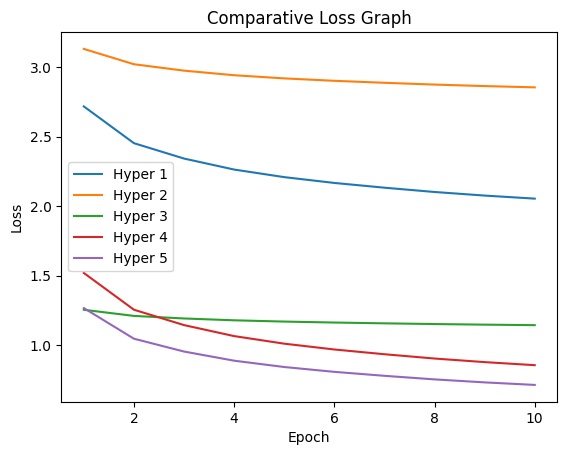

In [79]:
import matplotlib.pyplot as plt

# List of file paths for your 5 loss data files
file_paths = ['/kaggle/input/hyperparameters/output 3.txt', '/kaggle/input/hyperparameters/output 4.txt', '/kaggle/input/hyperparameters/output 5.txt', '/kaggle/input/hyperparameters/output.txt', '/kaggle/input/hyperparameters/train_model.txt']

# List to store loss data from each file
loss_data = []

# Read loss data from each file and store it
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        # Extract loss values from lines and convert them to floats
        loss_values = [float(line.split("Loss: ")[1]) for line in lines]
        loss_data.append(loss_values)

# Create a plot for each file's loss values
for i, loss_values in enumerate(loss_data):
    plt.plot(range(1, len(loss_values) + 1), loss_values, label=f'Hyper {i + 1}')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot or save it to a file
plt.title('Comparative Loss Graph')
plt.show()
